Back to **[Fan](https://fanwangecon.github.io/)**'s R4Econ Homepage **[Table of Content](https://fanwangecon.github.io/R4Econ/)**

# A CES Planner's Objective Function

We have a planer, who cares about some vector of $Y$. Suppose $Y$ is from a panel with individuals $i$, each observed for time periods $t$, then:

$$ \Omega\left( Y \right) = \left(  \frac{1}{N \cdot T}\sum_{i=1}^N \sum_{t=1}^T \left(Y_{it}\right)^{\rho} \right)^{\frac{1}{\rho}}$$

We can adjust the $\rho$ parameter. 
- When $\rho=0$, we have cobb-douglas, with complementarity between individual and time specific $Y_{it}$. 
- When $\rho=-\inf$, we have leontiff welfare, the planer only cares about the minimum $\min\left\{Y_{it}\right\}$ across individuals and time
- When $\rho=1$, we have perfect substitution, which means the planer cares only about the average of all $\frac{1}{N \cdot T}\sum_{i=1}^N \sum_{t=1}^T \left(Y_{it}\right)$.


In [212]:
library(tidyverse)

## Planer's Objective Function Program

Below we have the planer's objective function's program. And we can generate a vector of CES parameters. Using log-space below 0 and linspace between 0 and 1. We can not go to negative infinity, so we stop at $-150$.

In [213]:
parmam.ces.min <- -160
# Planer's objective function
# Constant Elasticity of Substitution over All Individuals
f_planer_obj  <- function(vec.y = c(80, 85, 90), param.ces = 0.5) {
    if (param.ces == 0) {
        obj <- prod(vec.y^(1/length(vec.y)))
    } else if (param.ces <= parmam.ces.min) {
        obj <- min(vec.y)
    } else {
        obj <- (mean(vec.y^param.ces))^(1/param.ces)
    } 
    return(obj)
}

# Vector of CES Parameters
f_ces_params_vec <- function(sca.len.right = 11, sca.len.left = 9) {
    vec.param.ces.right <- round(seq(-1, 1, length.out = sca.len.right), 2)
    vec.param.ces.left <- (-1)*unique(round(exp(log(10)*seq(log10(1), 
                                                       log10((-1)*parmam.ces.min),
                                                       length.out=sca.len.left))))
    vec.param.ces <- sort(unique(c(vec.param.ces.left, vec.param.ces.right)))
    return(vec.param.ces)
}

In [214]:
# Single Test
t(lapply(f_ces_params_vec(), f_planer_obj, vec.y = c(80, 85, 90)))

80,81.03516,81.8534,82.85632,83.68353,84.22414,84.51093,84.70571,84.8037,84.82332,84.84295,84.86258,84.88221,84.90185,84.92148,84.94112,84.96075,84.98038,85


## Welfare for Planer Across CES Parameters

We have a vector of Y: $$0.1, 0.2, 0.3$$

The Leontiff planer's objective/welfare will be $0.1$, only cares about the lowest. The Perfect substitution planer's objective/welfare will be $0.2$, because that is the average. The Planer's welfare is monotonically increasing as we go from Leontiff towards perfect substitution. 

This is shown graphically below.

In [215]:
# Test Planer Objective Function
vec.y <- c(0.1, 0.2, 0.3)
df.planer.obj.cesparams <- tibble(ces.param=f_ces_params_vec(), 
                                  planer.value=unlist(lapply(f_ces_params_vec(),
                                                      f_planer_obj, vec.y = vec.y)))
t(df.planer.obj.cesparams)

ces.param,-160.0,-85.0000000,-45.0000000,-24.0000000,-13.0000000,-7.0000000,-4.0000000,-2.0000000,-1.0000000,-0.8000000,-0.6000000,-0.4000000,-0.2000000,0.0000000,0.2000000,0.4000000,0.6000000,0.8000000,1.0
planer.value,0.1,0.1013009,0.1024714,0.1046839,0.1088172,0.1168555,0.1292539,0.1484615,0.1636364,0.1670884,0.1706447,0.1742836,0.1779812,0.1817121,0.1854503,0.1891707,0.1928496,0.1964655,0.2


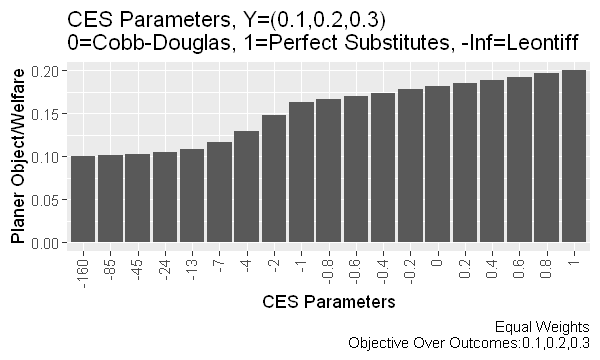

In [216]:
# Graphically
options(repr.plot.width = 5, repr.plot.height = 3)
df.planer.obj.cesparams %>%
    ggplot(aes(x=factor(ces.param), y=planer.value)) + 
    geom_bar(stat = 'identity') + 
    labs(title = paste0(paste0('CES Parameters, Y=(', paste0(vec.y, collapse=','), ')')
                          ,'\n0=Cobb-Douglas, 1=Perfect Substitutes, -Inf=Leontiff'),
           x = 'CES Parameters',
           y = 'Planer Object/Welfare',
           caption = paste0('Equal Weights\nObjective Over Outcomes:', 
                            paste0(vec.y, collapse=','))) +
    theme(axis.text.x = element_text(angle = 90, vjust=0.3, hjust = 1))
# + 
#     scale_x_discrete(labels = as.character(df.planer.obj.cesparams$ces.param),
#                      breaks = df.planer.obj.cesparams$ces.param)

## Welfare For Multiple Sets of Outcomes

How does planer objective/welfare change if the vector of $Y$ changes?

In [217]:
# Planer Test Function
f_planer_obj_tib_cesvec <- function(vec.y, vec.ces.params) {
    if(missing(vec.ces.params)) {
        vec.ces.params <- f_ces_params_vec(3, 3)
    }
    df.planer.obj.cesparams <- tibble(ces.param=vec.ces.params, 
                                      planer.value=unlist(lapply(vec.ces.params,
                                                                 f_planer_obj, vec.y = vec.y))) %>% 
                                    mutate(vec.y = paste0(vec.y, collapse=','))
            
    
    return(df.planer.obj.cesparams)
}

In [218]:
# Graphing Function
graphf_planer_obj_tib_cesvec <- function(df.vec.out.all.planer) {
df.vec.out.all.planer %>%
    ggplot(aes(x=factor(ces.param),
               y=planer.value, 
               fill=vec.y)) + 
    geom_bar(stat = 'identity', position = "dodge2") + 
    labs(title = paste0(paste0('CES Parameters, Various Y Vectors')
                          ,'\n0=Cobb-Douglas, 1=Perfect Substitutes, -Inf=Leontiff'),
           x = 'CES Parameters',
           y = 'Planer Object/Welfare',
           caption = paste0('Equal Weights')) +
    theme(axis.text.x = element_text(angle = 90, vjust=0.3, hjust = 1))
}

In [219]:
# a vector of different Ys
vec.out.a <- c(0.1, 0.15, 0.20)
vec.out.b <- c(0.1, 0.1, 0.1)
vec.out.c <- c(0.05, 0.10, 0.15)
vec.out.d <- c(0.12, 0.14, 0.16)
vec.out.all <- list(vec.out.a, vec.out.b, vec.out.c, vec.out.d)
vec.ces.params <- f_ces_params_vec(3, 3)
df.vec.out.all.planer <- bind_rows(lapply(vec.out.all, f_planer_obj_tib_cesvec, vec.ces.params = vec.ces.params))
t(df.vec.out.all.planer)
# f_ces_params_vec(3, 3)

ces.param,-160,-13,-1,0,1,-160,-13,-1,0,1,-160,-13,-1,0,1,-160,-13,-1,0,1
planer.value,0.10000000,0.10877432,0.13846154,0.14422496,0.15000000,0.10000000,0.10000000,0.10000000,0.10000000,0.10000000,0.05000000,0.05440860,0.08181818,0.09085603,0.10000000,0.12000000,0.12911186,0.13808219,0.13904107,0.14000000
vec.y,"0.1,0.15,0.2","0.1,0.15,0.2","0.1,0.15,0.2","0.1,0.15,0.2","0.1,0.15,0.2","0.1,0.1,0.1","0.1,0.1,0.1","0.1,0.1,0.1","0.1,0.1,0.1","0.1,0.1,0.1","0.05,0.1,0.15","0.05,0.1,0.15","0.05,0.1,0.15","0.05,0.1,0.15","0.05,0.1,0.15","0.12,0.14,0.16","0.12,0.14,0.16","0.12,0.14,0.16","0.12,0.14,0.16","0.12,0.14,0.16"


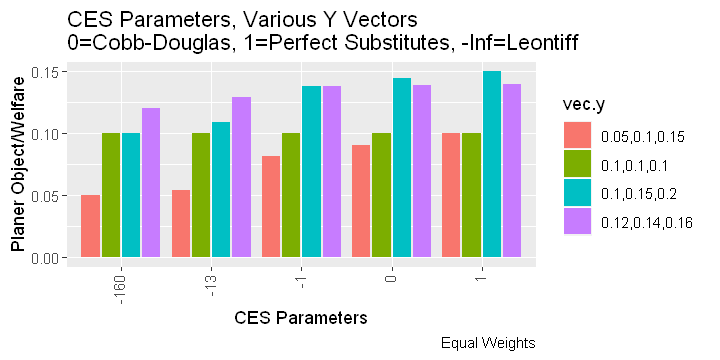

In [220]:
# Graphically
options(repr.plot.width = 6, repr.plot.height = 3)
graphf_planer_obj_tib_cesvec(df.vec.out.all.planer)

## Same Total Y, Different Distributions

Same total Y, different distributions. Because total Y is the same, there is no difference between objective if we only care about average (perfect substitution)

In [221]:
# a vector of different Ys
total <- 1
vec.out.a <- c(0.333, 0.333, 0.334)/total
vec.out.b <- c(0.50, 0.25, 0.25)/total
vec.out.c <- c(0.60, 0.30, 0.10)/total
vec.out.all <- list(vec.out.a, vec.out.b, vec.out.c)
vec.ces.params <- f_ces_params_vec(3, 3)
df.vec.out.all.planer <- bind_rows(lapply(vec.out.all, f_planer_obj_tib_cesvec, vec.ces.params = vec.ces.params))
t(df.vec.out.all.planer)
# f_ces_params_vec(3, 3) 

ces.param,-160,-13,-1,0,1,-160,-13,-1,0,1,-160,-13,-1,0,1
planer.value,0.3330000,0.3333287,0.3333327,0.3333330,0.3333333,0.2500000,0.2579191,0.3000000,0.3149803,0.3333333,0.1000000,0.1088182,0.2000000,0.2620741,0.3333333
vec.y,"0.333,0.333,0.334","0.333,0.333,0.334","0.333,0.333,0.334","0.333,0.333,0.334","0.333,0.333,0.334","0.5,0.25,0.25","0.5,0.25,0.25","0.5,0.25,0.25","0.5,0.25,0.25","0.5,0.25,0.25","0.6,0.3,0.1","0.6,0.3,0.1","0.6,0.3,0.1","0.6,0.3,0.1","0.6,0.3,0.1"


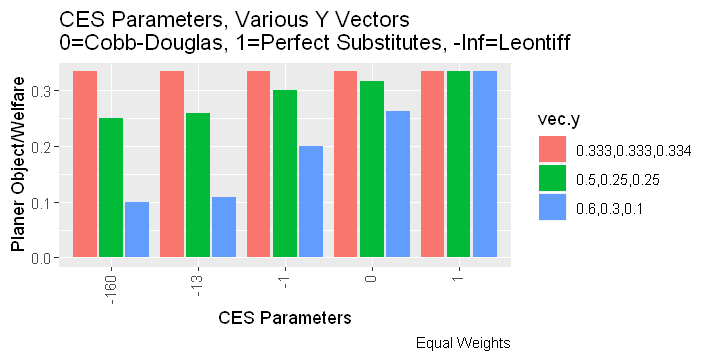

In [222]:
# Graphically
options(repr.plot.width = 6, repr.plot.height = 3)
graphf_planer_obj_tib_cesvec(df.vec.out.all.planer)